**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
import pandas as pd #til opgave 2
import matplotlib.pyplot as plt #til opgave 2
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [27]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [ ]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [2]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We want to calculate the mean value of the utility across all simulations for each career choice and the average experienced utility across all simulations for each career choice. 

We will follow this structure:
1. Simulation of the error terms.
2. Calculating the expected utility.
3. Calculating the average realized utility.
4. Displaying the results.


In [3]:
#Step 1: Simulation of the error terms.
#We set the seed to 42 to ensure reproducibility of the random numbers.
np.random.seed(42) 
#Now, we generate an array of numbers from a normal distribution with mean 0 and standard deviation par.sigma, which is 2.
#The shape of the array is par.J, par.K, which means that the array of numbers has 3 rows and 10000 columns: one for each
#career track and one for each simulation.
array_numbers = np.random.normal(0, par.sigma, (par.J, par.K))

In [4]:
#Step 2: Calculating the expected utility.
#We start by creating an array that stores the expected utility for each career track.
#The array is initialized with zeros and has a length of the array par.J.
expected_utility = np.zeros(par.J)

#Now we loop through each career track to calculate the expected utility.
for j in range(par.J):
    #We calculate the expected utility for career choice j.
    #par.v[j] is the utility value for career choice j.
    #np.mean(array_numbers[j, :]) calculates the mean of the error terms for career choice j across all simulations.
    expected_utility[j] = par.v[j] + np.mean(array_numbers[j, :])

In [5]:
#Step 3: Calculating the average realized utility.
#We create an array of utility values for each career choice.
#We reshape par.v from a 1D array into a 2D array (3, 1) so we can add the array_numbers array by matching the dimensions correctly.
#Each utility value (1, 2, or 3) is added to the corresponding error terms across all simulations.
realized_utility = par.v.reshape((par.J, 1)) + array_numbers
#We now calculate the average realized utility. np.mean(realized_utility, axis=1) calculates the mean of realized_utility across 
#all 10000 simulations for each career choice..
average_realized_utility = np.mean(realized_utility, axis=1)

In [6]:
#Step 4: Displaying the results.
for j in range(par.J):
    print(f"Career choice {j+1}:")
    print(f"  Expected Utility: {expected_utility[j]:.3f}")
    print(f"  Average Realized Utility: {average_realized_utility[j]:.3f}")

Career choice 1:
  Expected Utility: 0.996
  Average Realized Utility: 0.996
Career choice 2:
  Expected Utility: 2.027
  Average Realized Utility: 2.027
Career choice 3:
  Expected Utility: 2.975
  Average Realized Utility: 2.975


**Conclusion**:

Graduates rank the career tracks in terms of utility as follows: Career track 3 > career track 2 > career track 1 based on both their expectations and their actual experiences indicating a clear preference for career track 3.

The results show that for each career choice, the expected utility and average realized utility are very close to the base utility values (1, 2, and 3) respectively. This is due to the error terms having an average of zero - therefore they don't change the base utility values much and when using 10000 simulations it helps average out any random fluctuations, making the results stable. 

The expected utility for each career choice represents the average utility that graduates anticipate receiving from choosing a specific career track. This is calculated based on the known utility values of the career tracks and the simulated influence of friends' utilities. It reflects the graduates' perceptions or predictions about how beneficial each career track will be before they make their decision. 

The average realized utility for each career choice represents the actual utility that graduates experience after choosing a specific career track. This includes the inherent utility of the career track and the graduate's own random variations in utility. It shows the true benefits that graduates receive from their chosen career tracks, accounting for the randomness and variability in real-life outcomes.

The close match between expected utility and average realized utility implies that the graduates' decision-making process is effective, as their expectations are based on accurate assessments of the career tracks and they can make informed decisions based on their expectations, knowing that their actual experiences are likely to match these expectations.


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We want to simulate and visualize the decision-making process of graduates when choosing their careers by understanding: a) or each type of graduate, the proportion of times they choose each career track across multiple simulations, b) for each type of graduate, the average expected utility they perceive for the career track they choose, considering the influence of their friends and c) for each type of graduate, the actual utility they experience for the career track they choose, accounting for random variations. 

We wil follow this structure:
1. Define simulation function: Generate random error terms for friends and personal utilities, calculate prior expected utilities for each career track, determine the career choice with the highest expected utility, calculate the realized utility for the chosen career and store the results for each simulation.
2. Perform the simulation
3. Aggregate results
4. Display aggregated results
5. Extract data for plotting
6. Plot the results

In [7]:
#We ensure that when we print a dataframe, pandas will show all rows and columns, fit the display width automatically.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#Step 1: Define simulation function.
#This function simulates the career choices for the given parameters.
def simulate_career_choices(seed=42):
    np.random.seed(seed)
    results = []

    for k in range(par.K):
        #Step 1.1: We generate random error terms for friends and personal utilities.
        error_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        error_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}

        for i in range(1, par.N + 1):
            #Step 1.2: We calculate prior expected utilities.
            first_expected_utility = par.v + np.mean(error_friends[i], axis=0)

            #Step 1.3: We determine the career choice with the highest expected utility.
            career_chosen = np.argmax(first_expected_utility) + 1

            #Step 1.4: We calculate the realized utility.
            realized_utility = par.v[career_chosen - 1] + error_personal[i][career_chosen - 1]

            #Step 1.5: We store the results.
            results.append({
                'Graduate': i,
                'Career track': career_chosen,
                'Share of choices': 1 / par.K,
                'Expected utility': first_expected_utility[career_chosen - 1],
                'Realized utility': realized_utility
            })
    
    return pd.DataFrame(results)

In [8]:
#Step 2: We perform the simulation
results_df = simulate_career_choices()

In [9]:
#Step 3: Aggregate results
#We aggregate the results to get the average statistics per graduate and career track.
results_aggregated = results_df.groupby(['Graduate', 'Career track']).agg(
    Share_of_choices=pd.NamedAgg(column='Share of choices', aggfunc='sum'),
    Expected_utility=pd.NamedAgg(column='Expected utility', aggfunc='mean'),
    Realized_utility=pd.NamedAgg(column='Realized utility', aggfunc='mean')
).reset_index()

#We sort the dataframe for better readability
results_aggregated = results_aggregated.sort_values(by=['Graduate', 'Career track'])


In [10]:
#Step 4: We display the aggregated results
print(results_aggregated)

    Graduate  Career track  Share_of_choices  Expected_utility  \
0          1             1            0.1526          3.441558   
1          1             2            0.3002          3.833983   
2          1             3            0.5472          4.105014   
3          2             1            0.0926          2.911179   
4          2             2            0.2677          3.276323   
5          2             3            0.6397          3.651353   
6          3             1            0.0625          2.729710   
7          3             2            0.2504          3.120756   
8          3             3            0.6871          3.455232   
9          4             1            0.0476          2.591148   
10         4             2            0.2200          2.958790   
11         4             3            0.7324          3.335924   
12         5             1            0.0369          2.511058   
13         5             2            0.2047          2.893272   
14        

In the table above, each row represents a specific combination of graduate and career track, and each column provides specific information about that combination.

*Graduate* is the graduate number and ranges from 1 to par.N (10), *career track* is the career track number ranging from 1 to par.J (3), *share of choices* is the proportion of times this career track was chosen by this graduate across all simulations, *expected utility* is the average expected utility perceived by this graduate for this career track across all simulations, *realized utility* is the average realized utility experienced by this graduate for this career track across all simulations.

The first three rows can therefore be read as: Graduate 1 chose career track 1 about 15.26% of the time, career track 2 about 30.02% of the time, and career track 3 about 54.72% of the time. Therefore, career track 3 was the most popular choice among graduate 1. The expected utility for this graduate choosing career track 3 is approximately 3.44, which is higher than the expected utilities for career track 1 (0.15) and career track 2 (3.33). This suggests that graduate 1 perceives career track 3 to be significantly more beneficial compared to the other tracks. This also aligns with the realized utility, where graduate 1 has the highest realized utility for career track 3.

In [11]:
#Step 5: Extract Data for Plotting
#We extract the data needed for plotting from the aggregated results.
career_1_share = results_aggregated[results_aggregated['Career track'] == 1]['Share_of_choices'].values
career_2_share = results_aggregated[results_aggregated['Career track'] == 2]['Share_of_choices'].values
career_3_share = results_aggregated[results_aggregated['Career track'] == 3]['Share_of_choices'].values

career_1_expected = results_aggregated[results_aggregated['Career track'] == 1]['Expected_utility'].values
career_2_expected = results_aggregated[results_aggregated['Career track'] == 2]['Expected_utility'].values
career_3_expected = results_aggregated[results_aggregated['Career track'] == 3]['Expected_utility'].values

career_1_realized = results_aggregated[results_aggregated['Career track'] == 1]['Realized_utility'].values
career_2_realized = results_aggregated[results_aggregated['Career track'] == 2]['Realized_utility'].values
career_3_realized = results_aggregated[results_aggregated['Career track'] == 3]['Realized_utility'].values


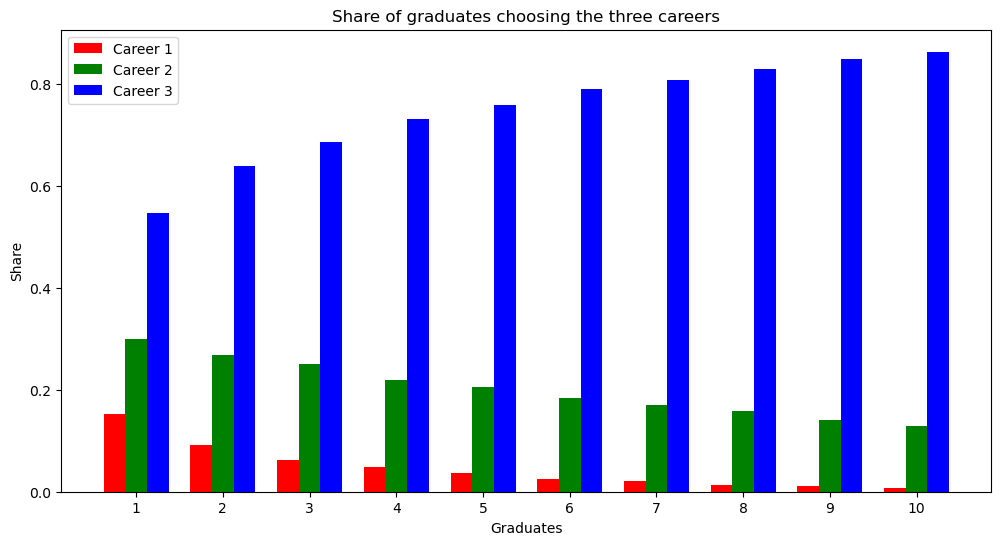

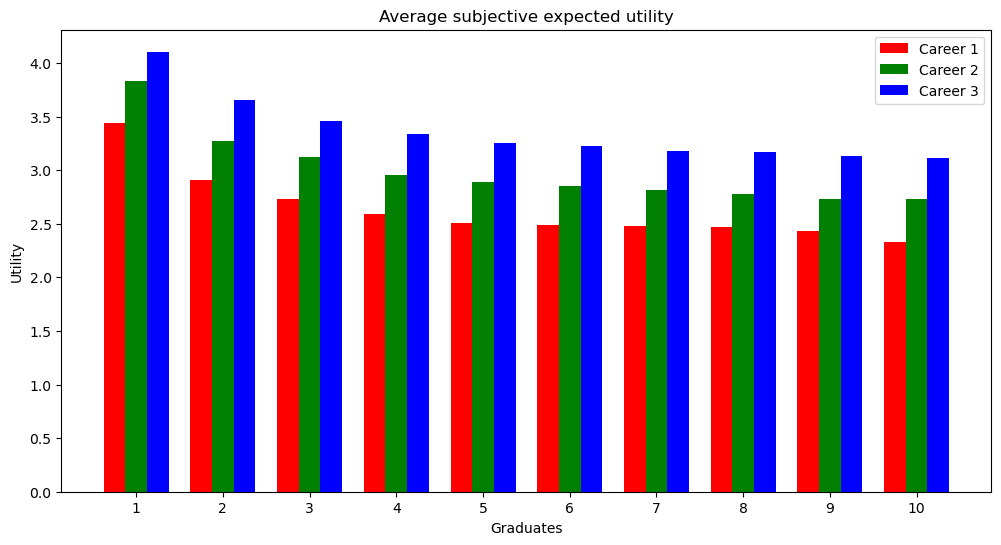

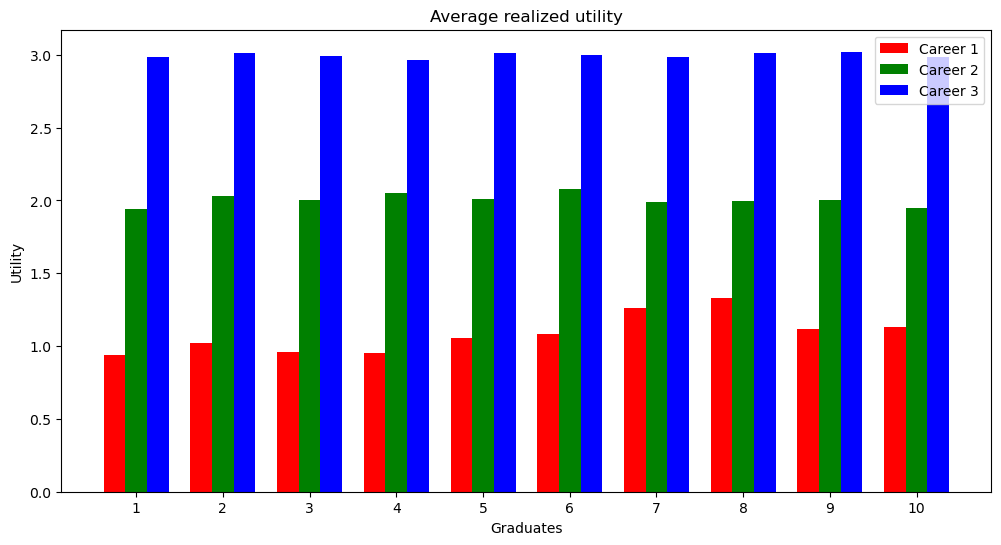

In [12]:
#Step 6: Plot the Results
#Step 6.1: Plot the share of choices for each graduate
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

x = np.arange(par.N)
ax.bar(x - width, career_1_share, width, label='Career 1', color='red')
ax.bar(x, career_2_share, width, label='Career 2', color='green')
ax.bar(x + width, career_3_share, width, label='Career 3', color='blue')

ax.set_xlabel('Graduates')
ax.set_ylabel('Share')
ax.set_title('Share of graduates choosing the three careers')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, par.N + 1))
ax.legend()

plt.show()

# Step 6.2: Plot the average subjective expected utility for each graduate
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

ax.bar(x - width, career_1_expected, width, label='Career 1', color='red')
ax.bar(x, career_2_expected, width, label='Career 2', color='green')
ax.bar(x + width, career_3_expected, width, label='Career 3', color='blue')

ax.set_xlabel('Graduates')
ax.set_ylabel('Utility')
ax.set_title('Average subjective expected utility')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, par.N + 1))
ax.legend()

plt.show()

# Step 6.3: Plot the average ex post realized utility for each graduate
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

ax.bar(x - width, career_1_realized, width, label='Career 1', color='red')
ax.bar(x, career_2_realized, width, label='Career 2', color='green')
ax.bar(x + width, career_3_realized, width, label='Career 3', color='blue')

ax.set_xlabel('Graduates')
ax.set_ylabel('Utility')
ax.set_title('Average realized utility')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, par.N + 1))
ax.legend()

plt.show()

The plots indicate that graduates tend to have higher expected utilities for career tracks popular among their friends. Social influence leads graduates to anticipate greater benefits from well seen tracks. For example, in the "Share of graduates choosing the three careers" plot, career 3 is the most popular, especially among graduates with more friends, such as graduate 10. This results in higher expected utilities for career 3.

Graduates with more friends receive more feedback, which can lead to higher expected utilities but also more variability in realized utility due to diverse experiences and opinions. The "Average realized utility" plot shows that graduates with more friends have more varied expected and realized utilities compared to those with fewer friends.

Overall, graduates' choices and expected utilities are heavily influenced by their friends' experiences, but there can be notable differences between expected and realized utilities, reflecting the complexity of career decision-making.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

Career Transitions:
          Initial chosen career  New chosen career
Graduate                                          
1                             3                  2
2                             1                  1
3                             3                  3
4                             3                  3
5                             2                  3
6                             3                  3
7                             2                  3
8                             3                  3
9                             3                  3
10                            3                  2

Average Subjective Expected Utility:
Graduate
1     3.903127
2     3.475167
3     3.329186
4     3.229504
5     3.155783
6     3.136430
7     3.105902
8     3.085244
9     3.072997
10    3.060882
Name: Prior expected utility, dtype: float64

Average Ex Post Realized Utility:
Graduate
1     2.948460
2     3.062785
3     3.128933
4     3.167271
5     3.177755
6     3

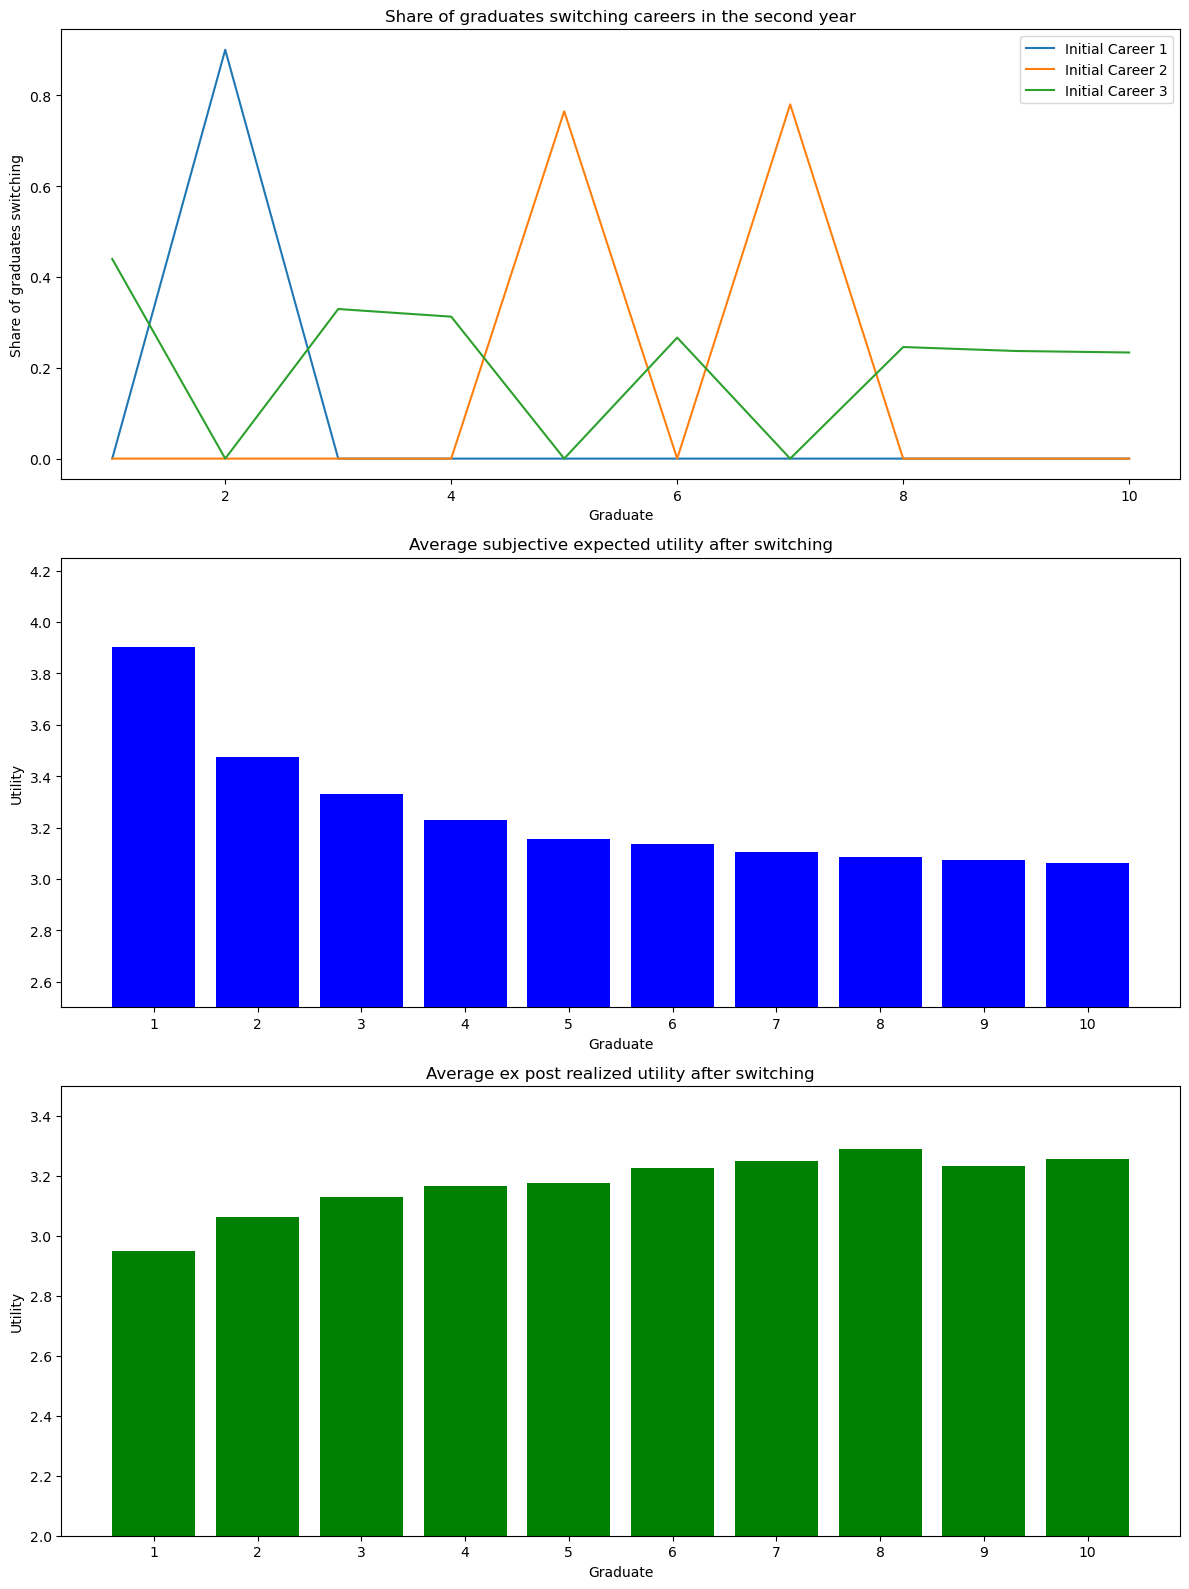

In [20]:
import numpy as np
import pandas as pd

# Assuming `par` is an object with parameters
class Parameters:
    K = 10000  # Number of simulation runs
    N = 10  # Number of graduates
    J = 3  # Number of career choices
    v = np.array([1, 2, 3])  # Utility values for careers
    sigma = 2  # Standard deviation for normal distribution
    c = 1  # Switching cost

par = Parameters()

# Step 1: Simulation function for initial career choices.
def simulate_career_choices(seed=42):
    np.random.seed(seed)
    initial_results = []
    
    for k in range(par.K):
        error_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        error_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        for i in range(1, par.N + 1):
            first_expected_utility = par.v + np.mean(error_friends[i], axis=0)
            career_chosen = np.argmax(first_expected_utility) + 1
            realized_utility = par.v[career_chosen - 1] + error_personal[i][career_chosen - 1]
            initial_results.append({
                'Graduate': i,
                'Chosen career': career_chosen,
                'Prior expected utility': first_expected_utility[career_chosen - 1],
                'Realized utility': realized_utility
            })
    
    return pd.DataFrame(initial_results)

# Step 2: Simulation function with switching decision.
def simulate_career_choices_with_switching(seed=42):
    np.random.seed(seed)
    # We simulate initial career choices.
    initial_results = simulate_career_choices(seed)
    results_switching = []

    # We loop over each simulation run.
    for k in range(par.K):
        # Generate random error terms for friends' opinions for each graduate.
        error_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        # Generate random error terms for personal experiences for each graduate.
        error_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        # We loop over each graduate.
        for i in range(1, par.N + 1):
            # Retrieve initial career choice for the graduate.
            initial_career_choice = initial_results.loc[initial_results['Graduate'] == i, 'Chosen career'].values[0]
            initial_realized_utility = initial_results.loc[initial_results['Graduate'] == i, 'Realized utility'].values[0]
            prior_expected_utility = initial_results.loc[initial_results['Graduate'] == i, 'Prior expected utility'].values[0]

            # Calculate prior expected utilities for each career using friends' opinions.
            prior_expected_utilities = par.v + np.mean(error_friends[i], axis=0)
            
            # Determine the career choice with the highest expected utility.
            chosen_career = np.argmax(prior_expected_utilities) + 1
            
            # Calculate the realized utility for the chosen career.
            realized_utility = par.v[chosen_career - 1] + error_personal[i][chosen_career - 1]
            
            # After calculating the realized utility, update the expected utilities considering the switching cost.
            new_prior_expected_utilities = prior_expected_utilities - par.c
            # Update the expected utility for the initially chosen career with the realized utility.
            new_prior_expected_utilities[chosen_career - 1] = realized_utility
            
            # Determine the new career choice with the highest updated expected utility.
            new_chosen_career = np.argmax(new_prior_expected_utilities) + 1
            # Calculate the realized utility for the new chosen career.
            new_realized_utility = par.v[new_chosen_career - 1] + error_personal[i][new_chosen_career - 1]
            
            # Store the results in a list.
            results_switching.append({
                'Graduate': i,
                'Initial chosen career': initial_career_choice,
                'Initial realized utility': initial_realized_utility,
                'New chosen career': new_chosen_career,
                'New realized utility': new_realized_utility,
                'Prior expected utility': prior_expected_utilities[chosen_career - 1],
                'Switched': initial_career_choice != new_chosen_career
            })
    
    return pd.DataFrame(results_switching)

# Step 3: Perform the simulation with switching.
results_with_switching_df = simulate_career_choices_with_switching()

# Step 4: Calculate the new optimal career choice for each graduate.
career_transitions = results_with_switching_df.groupby('Graduate').first()[['Initial chosen career', 'New chosen career']]

# Step 5: Calculate the average subjective expected utility and ex post realized utility.
average_subjective_expected_utility = results_with_switching_df.groupby('Graduate')['Prior expected utility'].mean()
average_ex_post_realized_utility = results_with_switching_df.groupby('Graduate')['New realized utility'].mean()

# Step 6: Calculate the share of graduates that switch careers, conditional on their initial career choice.
switching_stats_by_individual = results_with_switching_df.groupby(['Graduate', 'Initial chosen career'])['Switched'].mean().unstack(fill_value=0)

# Print results
print("Career Transitions:")
print(career_transitions)
print("\nAverage Subjective Expected Utility:")
print(average_subjective_expected_utility)
print("\nAverage Ex Post Realized Utility:")
print(average_ex_post_realized_utility)
print("\nSwitching Statistics by Individual:")
print(switching_stats_by_individual)

# Step 8: Visualize the results.
plt.figure(figsize=(12, 16))

# We plot the share of graduates that switch careers conditional on their initial career choice for each graduate.
plt.subplot(3, 1, 1)
for career in range(1, par.J + 1):
    plt.plot(switching_stats_by_individual.index, switching_stats_by_individual[career], label=f'Initial Career {career}')
plt.title('Share of graduates switching careers in the second year')
plt.xlabel('Graduate')
plt.ylabel('Share of graduates switching')
plt.legend()

# We plot the average subjective expected utility after switching.
plt.subplot(3, 1, 2)
plt.bar(average_subjective_expected_utility.index, average_subjective_expected_utility, color='blue')
plt.title('Average subjective expected utility after switching')
plt.xlabel('Graduate')
plt.ylabel('Utility')
plt.ylim(2.5, 4.25)
plt.xticks(np.arange(1, par.N + 1))

# We plot the average ex post realized utility after switching.
plt.subplot(3, 1, 3)
plt.bar(average_ex_post_realized_utility.index, average_ex_post_realized_utility, color='green')
plt.title('Average ex post realized utility after switching')
plt.xlabel('Graduate')
plt.ylabel('Utility')
plt.ylim(2, 3.5)
plt.xticks(np.arange(1, par.N + 1))

plt.tight_layout()
plt.show()


In this question, we analyze the career choices of graduates over two years. Initially, each graduate chooses a career based on the expected utility. After working in their chosen career for a year, they learn the true utility of that job. They can then decide whether to switch to another career for the second year, considering a switching cost. Our goal is to determine the new optimal career choices, calculate the expected and realized utilities, and find out how many graduates decide to switch careers.

We follow the structure:
1. Simulation function for initial career choices
2. Simulation function with switching decision
3. Perform the simulation with switching
4. Calculate the new optimal career choice for each graduate
5. Calculate the average subjective expected utility and ex post realized utility
6. Calculate the share of graduates that switch careers, conditional on their initial career choice for each graduate i
7. Display the results
8. Visualize the results

In [13]:
#Step 1: Simulation function for initial career choices.
#We follow the same procedure as in question 2.
def simulate_career_choices(seed=42):
    np.random.seed(seed)
    initial_results = []
    
    for k in range(par.K):
        error_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        error_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        for i in range(1, par.N + 1):
            first_expected_utility = par.v + np.mean(error_friends[i], axis=0)
            career_chosen = np.argmax(first_expected_utility) + 1
            realized_utility = par.v[career_chosen - 1] + error_personal[i][career_chosen - 1]
            initial_results.append({
                'Graduate': i,
                'Chosen career': career_chosen,
                'Prior expected utility': first_expected_utility[career_chosen - 1],
                'Realized utility': realized_utility
            })
    
    return pd.DataFrame(initial_results)

The following code will simulate how graduates choose their careers and decide whether to switch to a different career later on. We do this by taking into account both their friends' opinions and their own personal experiences. We find the following variables:
1. The initial career choice (chosen_career): Each graduate makes an initial career choice based on their own and their friends' opinions.
2. The realized utility (realized_utility): The utility they get from their initial career choice is calculated.
3. Considering switching (new_prior_expected_utilities and new_realized_utility): They then consider switching to a new career by re-evaluating their options, including a cost for switching careers.
4. New career choice (new_chosen_career): If they find a new career that offers higher utility even after accounting for the switching cost, they switch to that new career.

In [14]:
#Step 2: Simulation function with switching decision.
def simulate_career_choices_with_switching(seed=42):
    np.random.seed(seed)
    #We simulate initial career choices.
    initial_results = simulate_career_choices(seed)
    results_switching = []

    #We loop over each simulation run.
    for k in range(par.K):
        #We generate random error terms for friends' opinions for each graduate.
        error_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        #We generate random error terms for personal experiences for each graduate.
        error_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        #We loop over each graduate.
        for i in range(1, par.N + 1):
            #We calculate prior expected utilities for each career using friends' opinions.
            prior_expected_utilities = par.v + np.mean(error_friends[i], axis=0)
            
            #We determine the career choice with the highest expected utility.
            chosen_career = np.argmax(prior_expected_utilities) + 1
            
            #We calculate the realized utility for the chosen career.
            realized_utility = par.v[chosen_career - 1] + error_personal[i][chosen_career - 1]
            
            #After we have calculated the realized utility, we update the expected utilities considering the switching cost.
            new_prior_expected_utilities = prior_expected_utilities - par.c
            #We update the expected utility for the initially chosen career with the realized utility.
            new_prior_expected_utilities[chosen_career - 1] = realized_utility
            
            #We determine the new career choice with the highest updated expected utility.
            new_chosen_career = np.argmax(new_prior_expected_utilities) + 1
            #We calculate the realized utility for the new chosen career.
            new_realized_utility = par.v[new_chosen_career - 1] + error_personal[i][new_chosen_career - 1]
            
            #We store the results in a list.
            results_switching.append({
                'Graduate': i,
                'Initial chosen career': chosen_career,
                'Initial realized utility': realized_utility,
                'New chosen career': new_chosen_career,
                'New realized utility': new_realized_utility,
                'Prior expected utility': prior_expected_utilities[chosen_career - 1],
                'Switched': chosen_career != new_chosen_career
            })
    
    return pd.DataFrame(results_switching)

The following code will simulate how graduates choose their initial careers and decide whether to switch to a different career.

In [46]:
#Step 3: Perform the simulation with switching.
results_with_switching_df = simulate_career_choices_with_switching()

#Step 4: Calculate the new optimal career choice for each graduate.
#We group all the decisions made by each graduate. Then from each group of decisions, we pick the first one.
#Then we only keep the columns showing the graduate's initial career choice and their new career choice after considering switching.
career_transitions = results_with_switching_df.groupby('Graduate').first()[['Initial chosen career', 'New chosen career']]

#Step 5: Calculate the average subjective expected utility and ex post realized utility
#We group all the data by each graduate. After grouping by graduate, we select the 'Prior expected utility' column from each group. 
#This column contains the expected utility each graduate had before experiencing their chosen career.
#We get their average expected utility.
average_subjective_expected_utility = results_with_switching_df.groupby('Graduate')['Prior expected utility'].mean()
#We calculate the mean of the 'New realized utility' for each graduate.
average_ex_post_realized_utility = results_with_switching_df.groupby('Graduate')['New realized utility'].mean()

#Step 6: Calculate the share of graduates that switch careers, conditional on their initial career choice for each graduate i.
#After grouping by graduate and initial career choice, we select the 'Switched' column from each group indicating whether 
#the graduate switched careers. The mean will give the share of times the graduate switched careers
switching_stats_by_individual = results_with_switching_df.groupby(['Graduate', 'Initial chosen career'])['Switched'].mean().unstack(fill_value=0)

In [47]:
# Step 7: Display the results.
print("Career transitions:")
for i, row in career_transitions.iterrows():
    print(f"Graduate {i}: Initial career {row['Initial chosen career']} -> New career {row['New chosen career']}")

print("\nAverage subjective expected utility for each graduate:")
for i, utility in average_subjective_expected_utility.items():
    print(f"Graduate {i}: {utility:.3f}")

print("\nEx post realized utility for each graduate:")
for i, utility in average_ex_post_realized_utility.items():
    print(f"Graduate {i}: {utility}")

print(f"\nShare of graduates that switch careers, conditional on initial career choice for each graduate:")
print(switching_stats_by_individual)

Career transitions:
Graduate 1: Initial career 3 -> New career 2
Graduate 2: Initial career 1 -> New career 1
Graduate 3: Initial career 3 -> New career 3
Graduate 4: Initial career 3 -> New career 3
Graduate 5: Initial career 3 -> New career 3
Graduate 6: Initial career 3 -> New career 3
Graduate 7: Initial career 3 -> New career 3
Graduate 8: Initial career 3 -> New career 3
Graduate 9: Initial career 3 -> New career 3
Graduate 10: Initial career 2 -> New career 2

Average subjective expected utility for each graduate:
Graduate 1: 3.903
Graduate 2: 3.475
Graduate 3: 3.329
Graduate 4: 3.230
Graduate 5: 3.156
Graduate 6: 3.136
Graduate 7: 3.106
Graduate 8: 3.085
Graduate 9: 3.073
Graduate 10: 3.061

Ex post realized utility for each graduate:
Graduate 1: 2.948460264931331
Graduate 2: 3.062785347818466
Graduate 3: 3.1289328028983356
Graduate 4: 3.1672708486977714
Graduate 5: 3.1777546328994855
Graduate 6: 3.225732956050612
Graduate 7: 3.2512826534082504
Graduate 8: 3.2909706147373994
Gr

Table 'Career changes' indicate that most graduates stayed in their initial careers except for graduate 1, who switched from career 3 to career 2. The 'Average subjective expected utility for each graduate' table shows that graduate 1 had high expectations about their career choices and believed they would derive significant satisfaction from them. Graduate 1 has the lowest ex post realized utility indicating that graduate 1's actual career experience was the least satisfying among the graduates. The 'Share of graduates that switch careers, conditional on initial career choice for each graduate' table shows the proportion of times each graduate switched careers, depending on their initial career choice. The columns represent the initial career choices, and the values in the table indicate the share of times each graduate switched from that initial career. 

The results will now be visualized in figures.

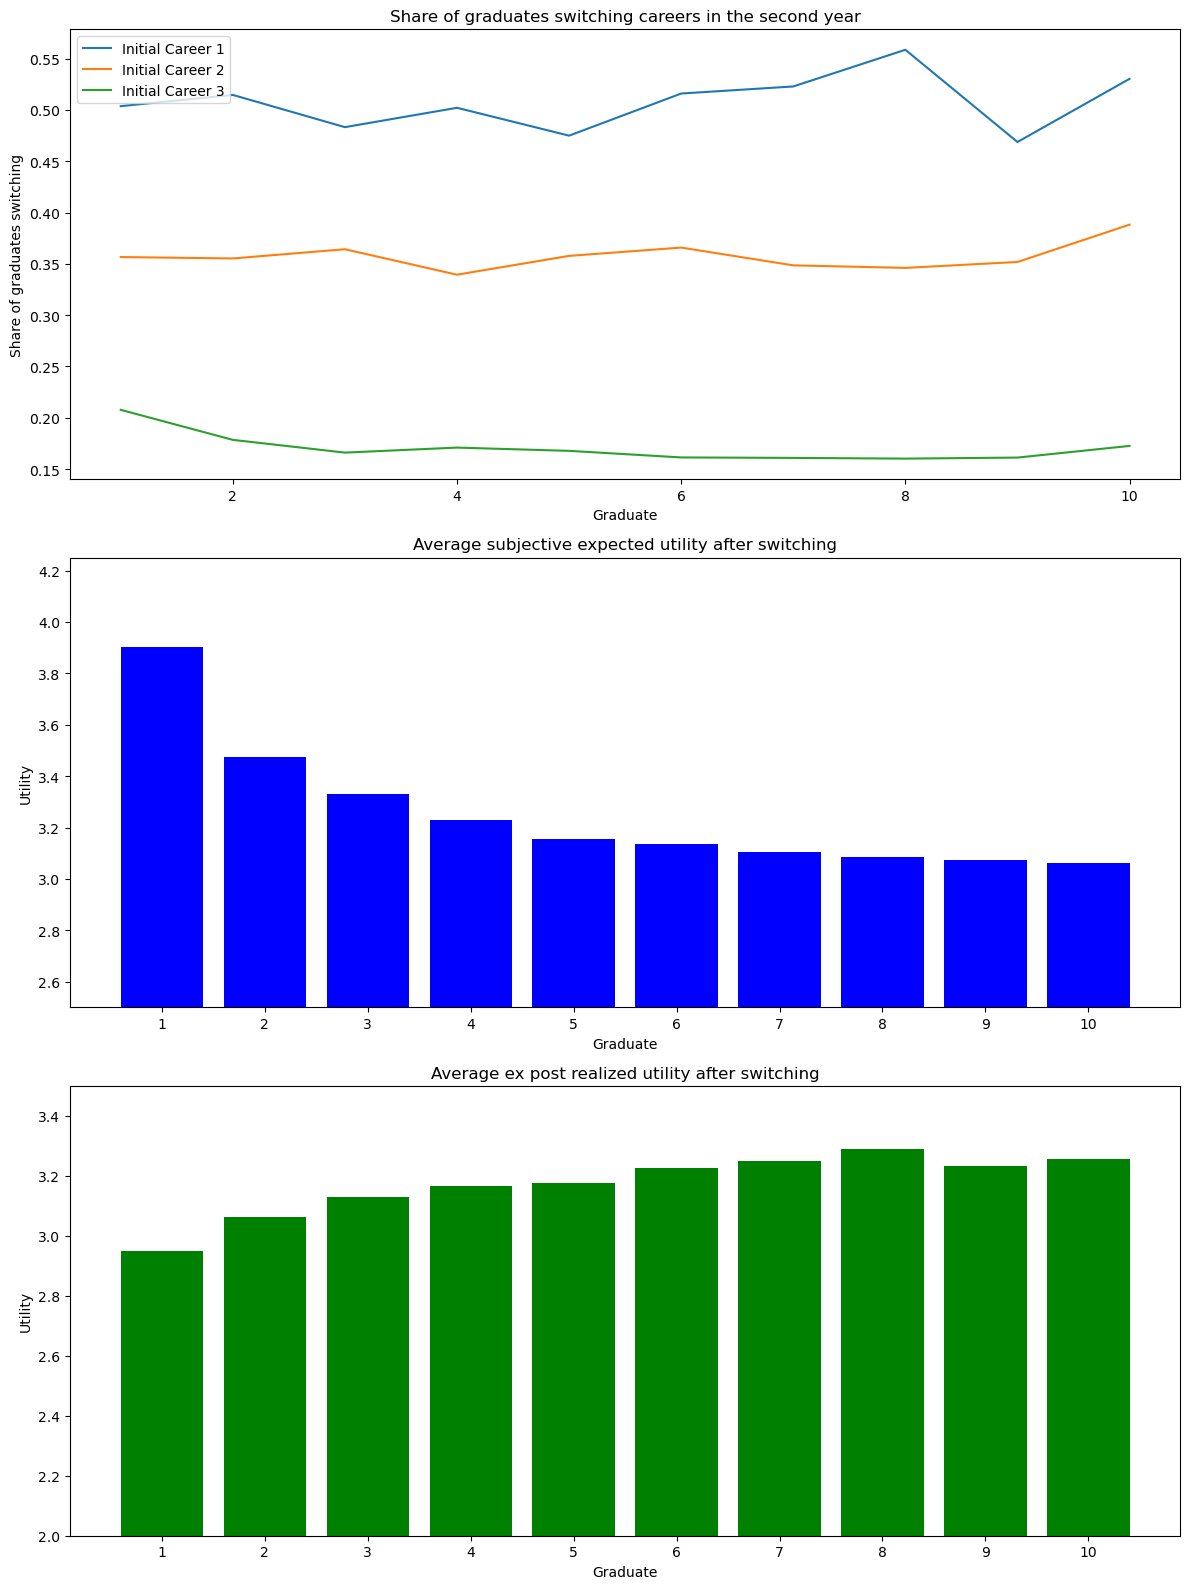

In [48]:
#Step 8: Visualize the results.
plt.figure(figsize=(12, 16))

#We plot the share of graduates that switch careers conditional on their initial career choice for each graduate.
plt.subplot(3, 1, 1)
for career in range(1, par.J + 1):
    plt.plot(switching_stats_by_individual.index, switching_stats_by_individual[career], label=f'Initial Career {career}')
plt.title('Share of graduates switching careers in the second year')
plt.xlabel('Graduate')
plt.ylabel('Share of graduates switching')
plt.legend()

#We plot the average subjective expected utility after switching.
plt.subplot(3, 1, 2)
plt.bar(average_subjective_expected_utility.index, average_subjective_expected_utility, color='blue')
plt.title('Average subjective expected utility after switching')
plt.xlabel('Graduate')
plt.ylabel('Utility')
plt.ylim(2.5, 4.25)
plt.xticks(np.arange(1, par.N + 1))

#We plot the average ex post realized utility after switching.
plt.subplot(3, 1, 3)
plt.bar(average_ex_post_realized_utility.index, average_ex_post_realized_utility, color='green')
plt.title('Average ex post realized utility after switching')
plt.xlabel('Graduate')
plt.ylabel('Utility')
plt.ylim(2, 3.5)
plt.xticks(np.arange(1, par.N + 1))

plt.tight_layout()
plt.show()

Figure 'Share of graduates switching careers in the second year' illustrates the share of graduates switching careers in the second year, differentiated by their initial career choices. Graduates who initially chose career 1, represented by the blue line, exhibit the highest switching rates, generally above 50%. This high rate indicates that those who chose career 1 found it less satisfying or perceived more appealing alternatives in other careers. Graduates who initially chose career 2 has a moderate rate suggesting a balance between satisfaction and the availability of better alternatives, indicating that career 2 provides a moderate level of stability. Finally, graduates who initially selected career 3, have the lowest switching rates, from 16% to 21%. This low rate implies high satisfaction with career 3 or fewer attractive alternatives, making career 3 the most stable career choice among the graduates.

Figure 'Average subjective expected utility after switching' shows a noticeable trend where the subjective expected utility decreases gradually from graduate 1 to graduate 10. This suggests a variation in initial career expectations among the graduates with increasing number of friends in the career. The 'Average ex post realized utility after switching' figure shows that graduate 1 has the lowest realized utility, around 2.95, indicating a significant gap between their high expectations and their actual career experience. On the other hand, the realized utility for graduates 2 to 10 ranges from 3.06 to 3.26. This shows relatively higher satisfaction compared to graduate 1, with a slight increase in utility among some graduates, suggesting that they found their career choices more satisfactory after switching.

**Conclusion**:

The results indicate that for most graduates, the initial career choice was optimal even after considering the switching costs and updated expectations. This suggests that the initial utilities were reasonably accurate or that the switching costs were significant enough to deter changes. Graduate 1's switch from career 3 to career 2 indicates a scenario where the updated utility minus the switching cost justified a career change. Overall, the analysis demonstrates that while there is variation in satisfaction and expectations, the majority of graduates find their initial career choices to be optimal or near-optimal, reflecting the effectiveness of their decision-making process.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here